In [1]:
# Convolutional Neural Network
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

from tensorflow.keras.datasets.mnist import load_data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
# reshape data to have a single channel
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

In [5]:
x_train.shape

(60000, 28, 28, 1)

In [6]:
x_test.shape

(10000, 28, 28, 1)

In [7]:
# determine the shape of the input images
input_shape = x_train.shape[1:]
print(input_shape)

(28, 28, 1)


In [8]:
# determine the number of classes
n_classes = len(np.unique(y_train))
print(n_classes)

10


In [9]:
# normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [10]:
## define model 1
# model = Sequential()
# model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
# model.add(MaxPool2D((2, 2)))
# model.add(Flatten())
# model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
# model.add(Dropout(0.5))
# model.add(Dense(n_classes, activation='softmax'))


## model 2
model = Sequential()
#model.add(Conv2D(32, (3, 3), padding="same", input_shape=(80, 80, 3), activation='relu'))
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu',padding="same"))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))

model.add(Flatten())
#model.add(Dense(512, activation='relu'))
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
#model.add(Dense(2, activation='softmax'))
model.add(Dense(n_classes, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

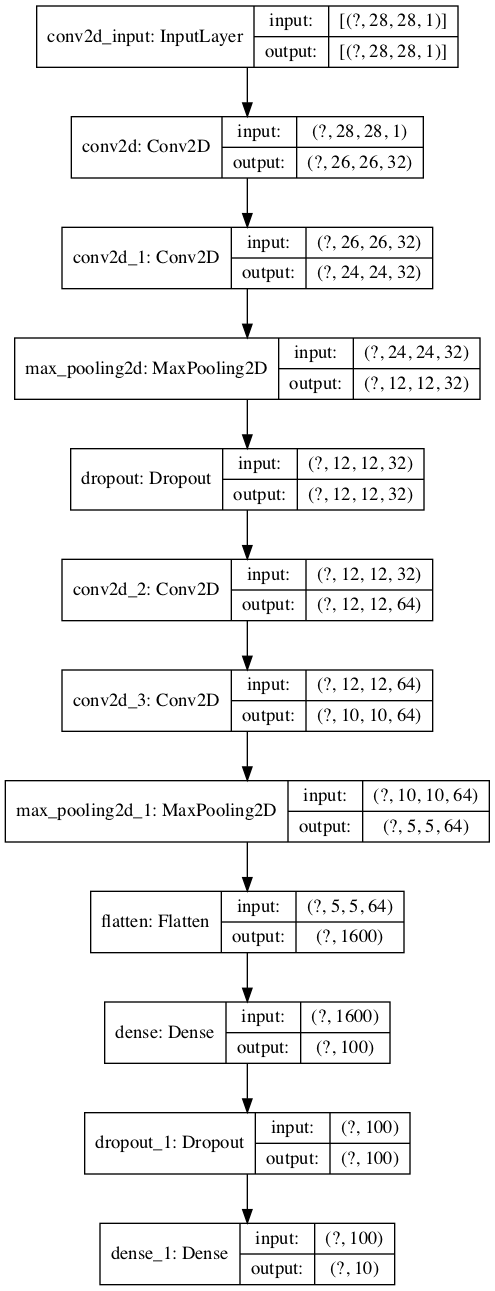

In [12]:
# plot the model
from tensorflow.keras.utils import plot_model

plot_model(model, 'model.png', show_shapes=True)

In [13]:
# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
# fit the model
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 34s 714us/sample - loss: 0.2147 - accuracy: 0.9319 - val_loss: 0.0489 - val_accuracy: 0.9854
Epoch 2/20
48000/48000 [==============================] - 34s 706us/sample - loss: 0.0590 - accuracy: 0.9820 - val_loss: 0.0395 - val_accuracy: 0.9885
Epoch 3/20
48000/48000 [==============================] - 35s 733us/sample - loss: 0.0428 - accuracy: 0.9871 - val_loss: 0.0351 - val_accuracy: 0.9907
Epoch 4/20
48000/48000 [==============================] - 35s 723us/sample - loss: 0.0320 - accuracy: 0.9902 - val_loss: 0.0274 - val_accuracy: 0.9918
Epoch 5/20
48000/48000 [==============================] - 35s 721us/sample - loss: 0.0266 - accuracy: 0.9914 - val_loss: 0.0342 - val_accuracy: 0.9902
Epoch 6/20
48000/48000 [==============================] - 33s 687us/sample - loss: 0.0241 - accuracy: 0.9928 - val_loss: 0.0270 - val_accuracy: 0.9923
Epoch 7/20
48000/48000 [====================

Text(0.5, 0, 'epoch')

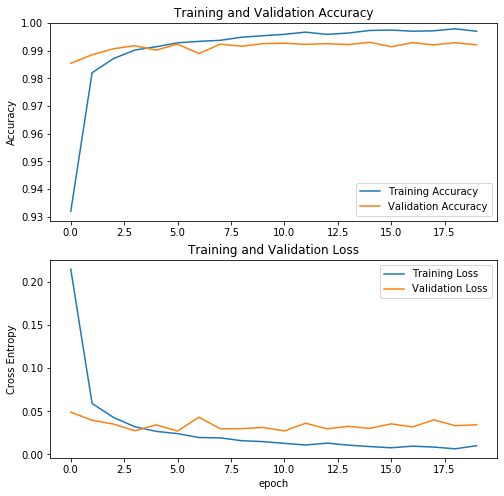

In [15]:
# Learning curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
#plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')

In [16]:
# evaluate the model
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)

Accuracy: 0.993


In [17]:
# make a prediction
itest = 1
yhat = model.predict([[x_test[itest]]])
print('Predicted: class=%d' % np.argmax(yhat))

Predicted: class=2


In [18]:
print('Actual: class=%d' % y_test[itest])

Actual: class=2
